# Objective

The goal of the problem is to predict whether a client will default on the loan payment or not, given the recent data of all the loan transactions. This can help the institution to distinguish future applicants who might default.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading

In [2]:
df1 = pd.read_csv("training_data.csv")
df1.head(3)

C:\Users\hp\AppData\Local\Temp\ipykernel_4272\2623370901.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("training_data.csv")


,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,...,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
0,0,31-Jul-91,Existing,0,0,1991,Rs.33121600.0,STANDARD PARTS CORPORATION,No,Undefined,...,0,Rs.40640000.0,Rs.40640000.0,126,2-Apr-91,4419763001,1,Axis Bank Ltd.,No,0
1,1,30-Apr-06,New,0,6,2006,Rs.32735520.0,FRANK & KERI AMESTOY,No,Urban,...,451120,Rs.43647360.0,Rs.43647360.0,123,10-Apr-06,1709796003,1,Bandhan Bank Ltd.,0,1
2,2,30-Jun-04,Existing,4,0,2004,Rs.1422400.0,TELECOMMQC L L C,No,Urban,...,541618,Rs.2844800.0,Rs.5961400.32,90,25-May-04,7464754008,1,CSB Bank Limited,Yes,0


In [3]:
df2 = pd.read_csv("testing_data.csv")
df2.head(3)

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,...,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line
0,105000,31-Mar-06,Existing,19,0,2006,Rs.4064000.0,Diversified Display Products o,No,Urban,...,17,326199,Rs.8128000.0,Rs.9403852.16,57,9-Mar-06,1702825000,0,ICICI Bank Ltd.,Yes
1,105001,31-Jan-95,Existing,0,0,1995,Rs.1463040.0,"FOOTE CONSULTING GROUP, INC.",Yes,Undefined,...,2,0,Rs.1625600.0,Rs.1625600.0,90,14-Dec-94,7908833003,1,South Indian Bank Ltd.,No
2,105002,30-Sep-06,Existing,7,5,2006,Rs.812800.0,INTEGRATED COMERCIAL ENTERPRIS,No,Urban,...,2,541611,Rs.1625600.0,Rs.3450336.0,81,25-Aug-06,2361626001,1,IDBI Bank Limited,Yes


In [4]:
df1.shape # we have 26 columns in traning dataset

(105000, 26)

In [5]:
df2.shape # we have 25 columns in testing dataset

(45000, 25)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         105000 non-null  int64 
 1   Date_Of_Disbursement       104765 non-null  object
 2   Business                   104985 non-null  object
 3   Jobs_Reatained             105000 non-null  int64 
 4   Jobs_Created               105000 non-null  int64 
 5   Year_Of_Commitment         105000 non-null  object
 6   Guaranteed_Approved _Loan  105000 non-null  object
 7   Borrower_Name              104997 non-null  object
 8   Low_Documentation_Loan     104633 non-null  object
 9   Demography                 105000 non-null  object
 10  State_Of_Bank              105000 non-null  object
 11  ChargedOff_Amount          105000 non-null  object
 12  Borrower_City              105000 non-null  object
 13  Borrower_State             105000 non-null  

In [7]:
(df1.isnull().sum()/df1.shape[0])*100

ID                           0.000000
Date_Of_Disbursement         0.223810
Business                     0.014286
Jobs_Reatained               0.000000
Jobs_Created                 0.000000
Year_Of_Commitment           0.000000
Guaranteed_Approved _Loan    0.000000
Borrower_Name                0.002857
Low_Documentation_Loan       0.349524
Demography                   0.000000
State_Of_Bank                0.000000
ChargedOff_Amount            0.000000
Borrower_City                0.000000
Borrower_State               0.000000
Gross_Amount_Balance         0.000000
Count_Employees              0.000000
Classification_Code          0.000000
Loan_Approved_Gross          0.000000
Gross_Amount_Disbursed       0.000000
Loan_Term                    0.000000
Commitment_Date              0.000000
Primary_Loan_Digit           0.000000
Code_Franchise               0.000000
Name_Of_Bank                 0.000000
Revolving_Credit_Line        0.467619
Default                      0.000000
dtype: float

In [8]:
# null values are present in the data but they are very less in percentage (<1%). So we can drop them.

In [9]:
df1['Date_Of_Disbursement'] = df1['Date_Of_Disbursement'].fillna(df1['Date_Of_Disbursement'].mode()[0])
df1['Business'] = df1['Business'].fillna(df1['Business'].mode()[0])
df1['Borrower_Name '] = df1['Borrower_Name '].fillna(df1['Borrower_Name '].mode()[0])
df1['Low_Documentation_Loan'] = df1['Low_Documentation_Loan'].fillna(df1['Low_Documentation_Loan'].mode()[0])
df1['Borrower_State'] = df1['Borrower_State'].fillna(df1['Borrower_State'].mode()[0])
df1['Revolving_Credit_Line'] = df1['Revolving_Credit_Line'].fillna(df1['Revolving_Credit_Line'].mode()[0])

In [10]:
df1.shape

(105000, 26)

In [11]:
(df1.isnull().sum()/df1.shape[0])*100

ID                           0.0
Date_Of_Disbursement         0.0
Business                     0.0
Jobs_Reatained               0.0
Jobs_Created                 0.0
Year_Of_Commitment           0.0
Guaranteed_Approved _Loan    0.0
Borrower_Name                0.0
Low_Documentation_Loan       0.0
Demography                   0.0
State_Of_Bank                0.0
ChargedOff_Amount            0.0
Borrower_City                0.0
Borrower_State               0.0
Gross_Amount_Balance         0.0
Count_Employees              0.0
Classification_Code          0.0
Loan_Approved_Gross          0.0
Gross_Amount_Disbursed       0.0
Loan_Term                    0.0
Commitment_Date              0.0
Primary_Loan_Digit           0.0
Code_Franchise               0.0
Name_Of_Bank                 0.0
Revolving_Credit_Line        0.0
Default                      0.0
dtype: float64

In [12]:
# No null values are present in the dataset 1.

In [13]:
(df2.isnull().sum()/df2.shape[0])*100

ID                            0.000000
Date_Of_Disbursement          0.240000
Business                      0.013333
Jobs_Reatained                0.000000
Jobs_Created                  0.000000
Year_Of_Commitment            0.000000
Guaranteed_Approved _Loan     0.000000
Borrower_Name                 0.004444
Low_Documentation_Loan        0.295556
Demography                    0.000000
State_Of_Bank                 0.000000
ChargedOff_Amount             0.000000
Borrower_City                 0.000000
Borrower_State                0.108889
Gross_Amount_Balance          0.000000
Count_Employees               0.000000
Classification_Code           0.000000
Loan_Approved_Gross           0.000000
Gross_Amount_Disbursed        0.000000
Loan_Term                     0.000000
Commitment_Date               0.000000
Primary_Loan_Digit            0.000000
Code_Franchise                0.000000
Name_Of_Bank                  0.000000
Revolving_Credit_Line        30.722222
dtype: float64

In [14]:
# Null values present in the test dataset 2

In [15]:
df2.columns

Index(['ID', 'Date_Of_Disbursement', 'Business', 'Jobs_Reatained',
       'Jobs_Created ', 'Year_Of_Commitment ', 'Guaranteed_Approved _Loan',
       'Borrower_Name ', 'Low_Documentation_Loan', 'Demography',
       'State_Of_Bank', 'ChargedOff_Amount ', 'Borrower_City',
       'Borrower_State', 'Gross_Amount_Balance', 'Count_Employees',
       'Classification_Code ', 'Loan_Approved_Gross',
       'Gross_Amount_Disbursed  ', 'Loan_Term', 'Commitment_Date',
       'Primary_Loan_Digit', 'Code_Franchise', 'Name_Of_Bank',
       'Revolving_Credit_Line'],
      dtype='object')

In [16]:
df2['Date_Of_Disbursement'] = df2['Date_Of_Disbursement'].fillna(df2['Date_Of_Disbursement'].mode()[0])
df2['Business'] = df2['Business'].fillna(df2['Business'].mode()[0])
df2['Borrower_Name '] = df2['Borrower_Name '].fillna(df2['Borrower_Name '].mode()[0])
df2['Low_Documentation_Loan'] = df2['Low_Documentation_Loan'].fillna(df2['Low_Documentation_Loan'].mode()[0])
df2['Borrower_State'] = df2['Borrower_State'].fillna(df2['Borrower_State'].mode()[0])
df2['Revolving_Credit_Line'] = df2['Revolving_Credit_Line'].fillna(df2['Revolving_Credit_Line'].mode()[0])

In [17]:
(df2.isnull().sum()/df2.shape[0])*100

ID                           0.0
Date_Of_Disbursement         0.0
Business                     0.0
Jobs_Reatained               0.0
Jobs_Created                 0.0
Year_Of_Commitment           0.0
Guaranteed_Approved _Loan    0.0
Borrower_Name                0.0
Low_Documentation_Loan       0.0
Demography                   0.0
State_Of_Bank                0.0
ChargedOff_Amount            0.0
Borrower_City                0.0
Borrower_State               0.0
Gross_Amount_Balance         0.0
Count_Employees              0.0
Classification_Code          0.0
Loan_Approved_Gross          0.0
Gross_Amount_Disbursed       0.0
Loan_Term                    0.0
Commitment_Date              0.0
Primary_Loan_Digit           0.0
Code_Franchise               0.0
Name_Of_Bank                 0.0
Revolving_Credit_Line        0.0
dtype: float64

In [18]:
# No more null values are present in the dataset 2

In [19]:
df1_cat = df1.select_dtypes('O')        # spliting the dataset 1 in categorical and numerical columns.
df1_num = df1.select_dtypes(np.number)

In [20]:
df2_cat = df2.select_dtypes('O')        # spliting the dataset 2 in categorical and numerical columns.
df2_num = df2.select_dtypes(np.number)

In [21]:
df1_cat.head(3)

,Date_Of_Disbursement,Business,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,Loan_Approved_Gross,Gross_Amount_Disbursed,Commitment_Date,Name_Of_Bank,Revolving_Credit_Line
0,31-Jul-91,Existing,1991,Rs.33121600.0,STANDARD PARTS CORPORATION,No,Undefined,AP,Rs.0.0,Mumbai,Maharashtra,Rs.0.0,Rs.40640000.0,Rs.40640000.0,2-Apr-91,Axis Bank Ltd.,No
1,30-Apr-06,New,2006,Rs.32735520.0,FRANK & KERI AMESTOY,No,Urban,TR,Rs.38283367.68,Delhi,Delhi,Rs.0.0,Rs.43647360.0,Rs.43647360.0,10-Apr-06,Bandhan Bank Ltd.,0
2,30-Jun-04,Existing,2004,Rs.1422400.0,TELECOMMQC L L C,No,Urban,AS,Rs.0.0,Bengaluru,Karnataka,Rs.0.0,Rs.2844800.0,Rs.5961400.32,25-May-04,CSB Bank Limited,Yes


In [22]:
df1_cat.columns

Index(['Date_Of_Disbursement', 'Business', 'Year_Of_Commitment ',
       'Guaranteed_Approved _Loan', 'Borrower_Name ', 'Low_Documentation_Loan',
       'Demography', 'State_Of_Bank', 'ChargedOff_Amount ', 'Borrower_City',
       'Borrower_State', 'Gross_Amount_Balance', 'Loan_Approved_Gross',
       'Gross_Amount_Disbursed  ', 'Commitment_Date', 'Name_Of_Bank',
       'Revolving_Credit_Line'],
      dtype='object')

In [23]:
df1['Gross_Amount_Balance'] = df1_cat['Gross_Amount_Balance'].str.replace("Rs.","")
df1['ChargedOff_Amount '] = df1_cat['ChargedOff_Amount '].str.replace("Rs.","")
df1['Loan_Approved_Gross'] = df1_cat['Loan_Approved_Gross'].str.replace("Rs.","")
df1['Gross_Amount_Disbursed  '] = df1_cat['Gross_Amount_Disbursed  '].str.replace("Rs.","")

C:\Users\hp\AppData\Local\Temp\ipykernel_4272\3918773472.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Gross_Amount_Balance'] = df1_cat['Gross_Amount_Balance'].str.replace("Rs.","")
C:\Users\hp\AppData\Local\Temp\ipykernel_4272\3918773472.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['ChargedOff_Amount '] = df1_cat['ChargedOff_Amount '].str.replace("Rs.","")
C:\Users\hp\AppData\Local\Temp\ipykernel_4272\3918773472.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Loan_Approved_Gross'] = df1_cat['Loan_Approved_Gross'].str.replace("Rs.","")
C:\Users\hp\AppData\Local\Temp\ipykernel_4272\3918773472.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Gross_Amount_Disbursed  '] = df1_cat['Gross_Amount_Disbursed  '].str.replace("Rs.","")


In [24]:
df1['Gross_Amount_Balance'] = df1['Gross_Amount_Balance'].astype(float)

In [25]:
df1['Gross_Amount_Disbursed  '] = df1['Gross_Amount_Disbursed  '].astype(float)
df1['Loan_Approved_Gross'] = df1['Loan_Approved_Gross'].astype(float)
df1['ChargedOff_Amount '] = df1['ChargedOff_Amount '].astype(float)

In [26]:
df1['Year_Of_Commitment '] = df1['Year_Of_Commitment '].str.replace("A","")
df1['Year_Of_Commitment '] = df1['Year_Of_Commitment '].fillna(df1['Year_Of_Commitment '].mode()[0])

In [27]:
df1['Year_Of_Commitment '].unique()

array(['1991', '2006', '2004', '2005', '2001', '2007', '1996', '2002',
       '1997', '2009', '2008', '2010', '1993', '1994', '2011', '1999',
       '2003', '1995', '2013', '2000', '1998', '1990', '1989', '1988',
       '1992', '2012', '1986', '1985', '1984', '1983', '1987', '1982',
       '1977', '1980', '1979', '1970', '1978', '1981', '1972', '1973',
       '2014', '1971', '1976', '1974', '1969', '1975'], dtype=object)

In [28]:
df1['Year_Of_Commitment '] = df1['Year_Of_Commitment '].astype(int)

In [29]:
# spliting the categorical and numerical column after altering the dataset.

In [30]:
df1_cat = df1.select_dtypes('O')
df1_num = df1.select_dtypes(np.number)

In [31]:
df1_cat.head(2)

,Date_Of_Disbursement,Business,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,Borrower_City,Borrower_State,Commitment_Date,Name_Of_Bank,Revolving_Credit_Line
0,31-Jul-91,Existing,Rs.33121600.0,STANDARD PARTS CORPORATION,No,Undefined,AP,Mumbai,Maharashtra,2-Apr-91,Axis Bank Ltd.,No
1,30-Apr-06,New,Rs.32735520.0,FRANK & KERI AMESTOY,No,Urban,TR,Delhi,Delhi,10-Apr-06,Bandhan Bank Ltd.,0


In [32]:
df1_num.head(2)

,ID,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,ChargedOff_Amount,Gross_Amount_Balance,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Primary_Loan_Digit,Code_Franchise,Default
0,0,0,0,1991,0.00,0.0,38,0,40640000.0,40640000.0,126,4419763001,1,0
1,1,0,6,2006,38283367.68,0.0,6,451120,43647360.0,43647360.0,123,1709796003,1,1


In [33]:
df2_cat.head(3)

,Date_Of_Disbursement,Business,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,Loan_Approved_Gross,Gross_Amount_Disbursed,Commitment_Date,Name_Of_Bank,Revolving_Credit_Line
0,31-Mar-06,Existing,2006,Rs.4064000.0,Diversified Display Products o,No,Urban,GJ,Rs.8050784.0,Safidon,Haryana,Rs.0.0,Rs.8128000.0,Rs.9403852.16,9-Mar-06,ICICI Bank Ltd.,Yes
1,31-Jan-95,Existing,1995,Rs.1463040.0,"FOOTE CONSULTING GROUP, INC.",Yes,Undefined,AS,Rs.0.0,Nanjikottai,Tamil Nadu,Rs.0.0,Rs.1625600.0,Rs.1625600.0,14-Dec-94,South Indian Bank Ltd.,No
2,30-Sep-06,Existing,2006,Rs.812800.0,INTEGRATED COMERCIAL ENTERPRIS,No,Urban,ML,Rs.1625600.0,Tonk,Rajasthan,Rs.0.0,Rs.1625600.0,Rs.3450336.0,25-Aug-06,IDBI Bank Limited,Yes


In [34]:
df2['Year_Of_Commitment '] = df2['Year_Of_Commitment '].str.replace("A","")

In [35]:
df2['Year_Of_Commitment '] = df2['Year_Of_Commitment '].astype(int)

In [36]:
df2['Gross_Amount_Balance'] = df2_cat['Gross_Amount_Balance'].str.replace("Rs.","")
df2['ChargedOff_Amount '] = df2_cat['ChargedOff_Amount '].str.replace("Rs.","")
df2['Loan_Approved_Gross'] = df2_cat['Loan_Approved_Gross'].str.replace("Rs.","")
df2['Gross_Amount_Disbursed  '] = df2_cat['Gross_Amount_Disbursed  '].str.replace("Rs.","")

C:\Users\hp\AppData\Local\Temp\ipykernel_4272\487262952.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['Gross_Amount_Balance'] = df2_cat['Gross_Amount_Balance'].str.replace("Rs.","")
C:\Users\hp\AppData\Local\Temp\ipykernel_4272\487262952.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['ChargedOff_Amount '] = df2_cat['ChargedOff_Amount '].str.replace("Rs.","")
C:\Users\hp\AppData\Local\Temp\ipykernel_4272\487262952.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['Loan_Approved_Gross'] = df2_cat['Loan_Approved_Gross'].str.replace("Rs.","")
C:\Users\hp\AppData\Local\Temp\ipykernel_4272\487262952.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['Gross_Amount_Disbursed  '] = df2_cat['Gross_Amount_Disbursed  '].str.replace("Rs.","")


In [37]:
df2['Gross_Amount_Balance'] = df2['Gross_Amount_Balance'].astype(float)
df2['Gross_Amount_Disbursed  '] = df2['Gross_Amount_Disbursed  '].astype(float)
df2['Loan_Approved_Gross'] = df2['Loan_Approved_Gross'].astype(float)
df2['ChargedOff_Amount '] = df2['ChargedOff_Amount '].astype(float)

In [38]:
# spliting the categorical and numerical column after altering the dataset.

In [39]:
df2_cat = df2.select_dtypes('O')
df2_num = df2.select_dtypes(np.number)

## EDA

In [40]:
df1.Default.value_counts()

0    75896
1    29104
Name: Default, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


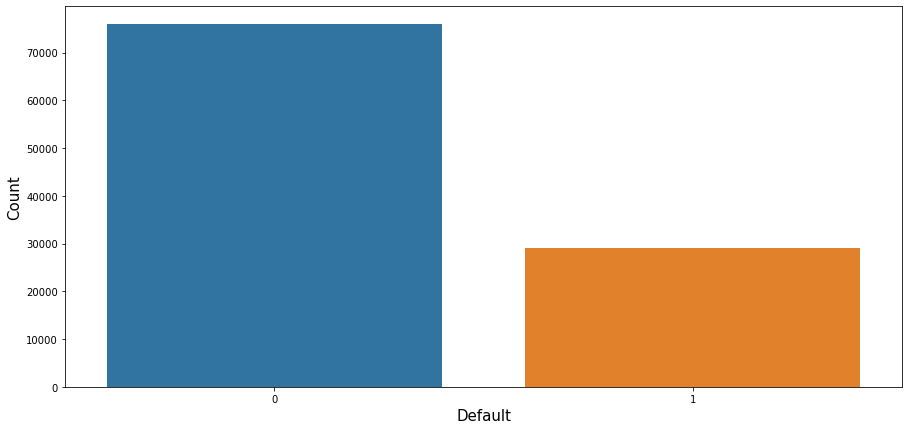

In [41]:
plt.figure(figsize=(15,7))
sns.countplot(df1.Default)
plt.xlabel("Default",fontsize =15)
plt.ylabel("Count",fontsize= 15)
plt.show()

In [42]:
# so our target variable is imbalanced. We have to balance our variable.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


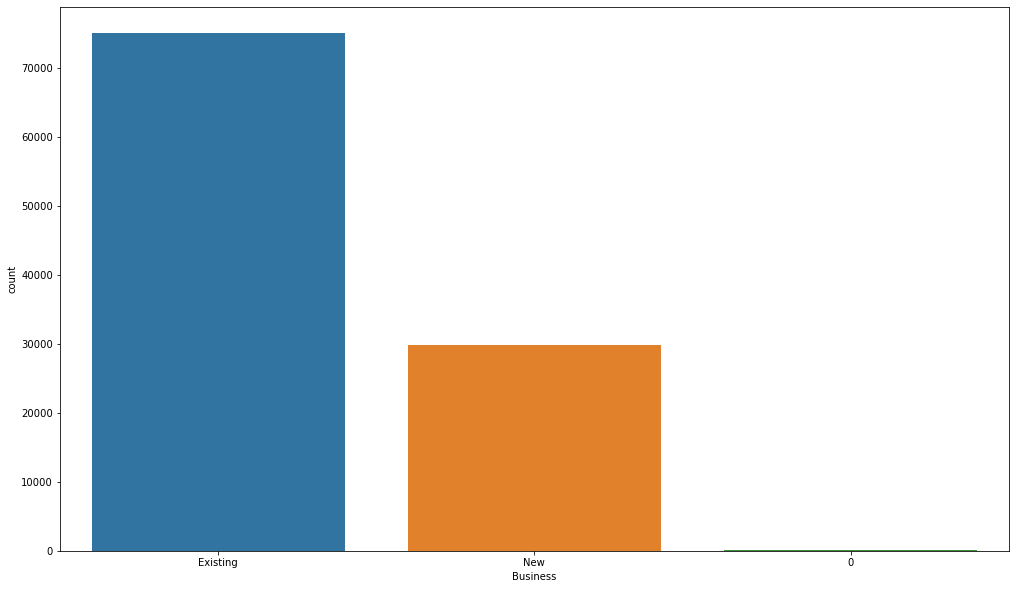

In [43]:
plt.figure(figsize=(17,10))
sns.countplot(df1['Business'])
plt.show()

In [44]:
# Most of the business are existing type.

## Encoding the categorical column

In [45]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

df1_final = df1.copy()

df1_cat_num = pd.DataFrame()
col = df1_cat.columns
for i in col:
    df1_cat_num[i] = le.fit_transform(df1_cat[i])

for i in col:
    df1_final[i] = df1_cat_num[i].copy()

In [46]:
df1_final.head(3)

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,...,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
0,0,2814,1,0,0,1991,4942,83623,3,1,...,0,40640000.0,40640000.00,126,2791,4419763001,1,11,6,0
1,1,2587,2,0,6,2006,4878,34347,3,2,...,451120,43647360.0,43647360.00,123,230,1709796003,1,13,1,1
2,2,2647,1,4,0,2004,1443,88370,3,2,...,541618,2844800.0,5961400.32,90,4468,7464754008,1,26,9,0


In [47]:
df1_final.shape

(105000, 26)

In [48]:
df1_final['ID'].nunique()

105000

In [49]:
# so the 'ID' is different each person and it is not going to help in model building. so we can drop the column.
df1_final.drop('ID',axis=1,inplace= True)

In [50]:
# now doing the similer process for df2.

In [51]:
df2_final = df2.copy()

df2_cat_num = pd.DataFrame()
col = df2_cat.columns
for i in col:
    df2_cat_num[i] = le.fit_transform(df2_cat[i])

for i in col:
    df2_final[i] = df2_cat_num[i].copy()

In [52]:
df2_final.head(3)

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,...,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line
0,105000,1717,1,19,0,2006,3534,12186,3,2,...,17,326199,8128000.0,9403852.16,57,6640,1702825000,0,57,1
1,105001,1681,1,0,0,1995,918,14507,6,1,...,2,0,1625600.0,1625600.00,90,1120,7908833003,1,120,0
2,105002,1620,1,7,5,2006,5612,18883,3,2,...,2,541611,1625600.0,3450336.00,81,3781,2361626001,1,58,1


In [53]:
print(df2_final.shape)

(45000, 25)


In [54]:
df2_final['ID'].nunique()

45000

In [55]:
# so the 'ID' is different each person and it is not going to help in model building. so we can drop the column.
df2_final.drop('ID',axis=1,inplace= True)

### Now spliting the df1_final dataset in train and test set

In [56]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df1_final.drop('Default',axis=1)
y = df1_final['Default']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10 ,test_size=0.20)

y_train.value_counts()

0    60722
1    23278
Name: Default, dtype: int64

In [57]:
# our target variable is imbalanced, so we have to do over sampling or under sampling to solve the problem.

In [58]:
sm1 =SMOTE(random_state= 100)
X_train_res,y_train_res = sm1.fit_resample(X_train,y_train.ravel())

In [59]:
y_train_res = pd.DataFrame(y_train_res,columns=['Default'])
y_train_res.value_counts()

Default
0          60722
1          60722
dtype: int64

In [60]:
# now our target variable is balanced.

## Modeling

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score,f1_score

In [62]:
logreg1=LogisticRegression()
logreg1.fit(X_train_res,y_train_res)
print(logreg1.score(X_test,y_test))

y_pred = logreg1.predict(X_test)
print(classification_report(y_test,y_pred))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9874285714285714
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15174
           1       0.99      0.97      0.98      5826

    accuracy                           0.99     21000
   macro avg       0.99      0.98      0.98     21000
weighted avg       0.99      0.99      0.99     21000



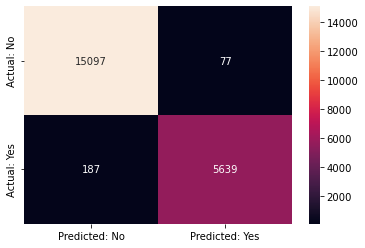

In [63]:
cm = confusion_matrix(y_test, y_pred)
cm

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

In [64]:
# Feature selection

In [65]:
from sklearn.feature_selection import RFE
n_features_list = list(range(1, 23))
score =[]
for n_features in range(1, 23):
    logreg = LogisticRegression()
    rfe_n = RFE(estimator=logreg, n_features_to_select=n_features)
    rfe_n.fit(X_train_res, y_train_res)
    col_n = X_train_res.columns[rfe_n.support_]
    X_train_rfe_n = X_train_res[col_n]
    X_test_rfe_n = X_test[col_n]
    lo = logreg.fit(X_train_rfe_n,y_train_res)
    s = lo.score(X_test_rfe_n,y_test)
    score.append(s)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

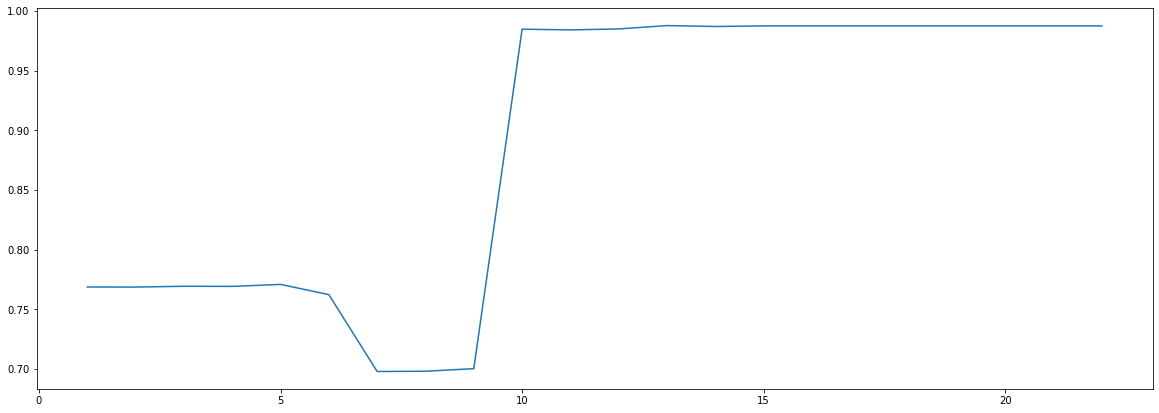

In [66]:
import matplotlib.ticker as plticker
plt.figure(figsize=(20,7))
plt.plot(n_features_list,score)
plt.show()

In [67]:
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select= 15)
rfe.fit(X_train_res, y_train_res)
col = X_train_res.columns[rfe.support_]
print("Important features ", col)

X_train_15= X_train_res[col]
X_test_15 = X_test[col]

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Important features  Index(['Date_Of_Disbursement', 'Jobs_Reatained', 'Jobs_Created ',
       'Year_Of_Commitment ', 'Guaranteed_Approved _Loan', 'Borrower_Name ',
       'ChargedOff_Amount ', 'Borrower_City', 'Classification_Code ',
       'Loan_Approved_Gross', 'Gross_Amount_Disbursed  ', 'Loan_Term',
       'Commitment_Date', 'Primary_Loan_Digit', 'Code_Franchise'],
      dtype='object')


In [68]:
logreg2=LogisticRegression()
logreg2.fit(X_train_15,y_train_res)
print(logreg2.score(X_test_15,y_test))

y_pred2 = logreg2.predict(X_test_15)
print(classification_report(y_test,y_pred2))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9874285714285714
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15174
           1       0.99      0.97      0.98      5826

    accuracy                           0.99     21000
   macro avg       0.99      0.98      0.98     21000
weighted avg       0.99      0.99      0.99     21000



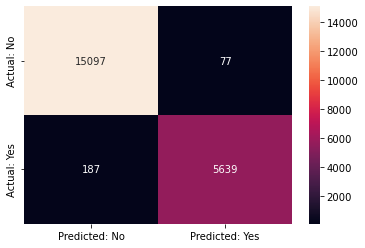

In [69]:
cm = confusion_matrix(y_test, y_pred2)
cm

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

In [70]:
# by doing feature selection no improvement can be seen in the model.

In [71]:
## Adaboost model

In [72]:
ada_model = AdaBoostClassifier(n_estimators = 50, random_state = 10)
ada_model.fit(X_train_15, y_train_res)

print(ada_model.score(X_test_15, y_test))
y_pred3 = ada_model.predict(X_test_15)
print(classification_report(y_test,y_pred3))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9942857142857143
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15174
           1       0.98      1.00      0.99      5826

    accuracy                           0.99     21000
   macro avg       0.99      0.99      0.99     21000
weighted avg       0.99      0.99      0.99     21000



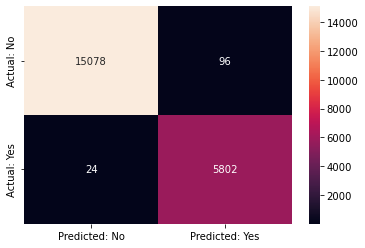

In [73]:
cm = confusion_matrix(y_test, y_pred3)
cm

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

In [74]:
## Randomforest model

In [75]:
rf =  RandomForestClassifier(n_estimators=150,max_depth=20,random_state=10) 
rf.fit(X_train_15, y_train_res)
print(rf.score(X_test_15,y_test))

y_pred4 = rf.predict(X_test_15)
print(classification_report(y_test,y_pred4))

C:\Users\hp\AppData\Local\Temp\ipykernel_4272\1476163426.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_15, y_train_res)


0.9944285714285714
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15174
           1       0.98      1.00      0.99      5826

    accuracy                           0.99     21000
   macro avg       0.99      1.00      0.99     21000
weighted avg       0.99      0.99      0.99     21000



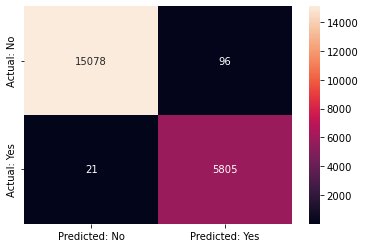

In [77]:
cm = confusion_matrix(y_test, y_pred4)
cm

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

In [76]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



params = { 'n_estimators': [90, 100, 150, 200],
'max_depth': [10, 15, 20,25]}


grid1 = RandomizedSearchCV(RandomForestClassifier(), params,cv=3)
grid1.fit(X_train_15, y_train_res)



print(grid1.best_params_)
best_rf = grid1.best_estimator_
print(best_rf)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed whe

{'n_estimators': 150, 'max_depth': 10}
RandomForestClassifier(max_depth=10, n_estimators=150)


In [88]:
rf1 =  RandomForestClassifier(n_estimators=150,max_depth=10,random_state=10) 
rf1.fit(X_train_15, y_train_res)
print(rf1.score(X_test_15,y_test))

y_pred5 = rf1.predict(X_test_15)
print(classification_report(y_test,y_pred5))

C:\Users\hp\AppData\Local\Temp\ipykernel_4272\3949610615.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train_15, y_train_res)


0.9943809523809524
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15174
           1       0.98      1.00      0.99      5826

    accuracy                           0.99     21000
   macro avg       0.99      0.99      0.99     21000
weighted avg       0.99      0.99      0.99     21000



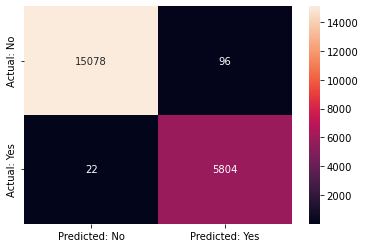

In [89]:
cm = confusion_matrix(y_test, y_pred5)
cm

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

In [80]:
gb = GradientBoostingClassifier(n_estimators = 320,max_depth= 5,learning_rate=0.01)
gb.fit(X_train_15, y_train_res)


print(gb.score(X_test_15,y_test))
y_pred6 = gb.predict(X_test_15)
print(classification_report(y_test,y_pred6))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9944285714285714
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15174
           1       0.98      1.00      0.99      5826

    accuracy                           0.99     21000
   macro avg       0.99      1.00      0.99     21000
weighted avg       0.99      0.99      0.99     21000



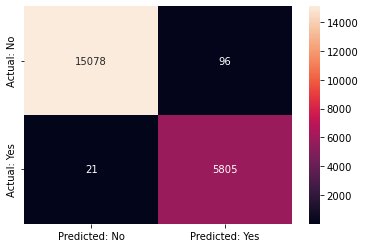

In [81]:
cm = confusion_matrix(y_test, y_pred6)
cm

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

In [90]:
from xgboost import XGBClassifier

In [92]:
params ={ 'n_estimators' : [100, 120, 150],
    'learning_rate' : [0.1, 0.01, 0.001, 0.15, 0.015], 
    'gamma' : [2, 3, 4, 5, 6],
    'max_depth' : [2, 3, 4, 5, 6]}
grid2 = RandomizedSearchCV(XGBClassifier(), params)
grid2.fit(X_train_15, y_train_res)



{'n_estimators': 150, 'max_depth': 10}


In [93]:
print(grid2.best_params_)

{'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 6}


In [94]:
xgb = XGBClassifier(n_estimators = 100,learning_rate= 0.15,gamma = 6,max_depth= 5)
xgb.fit(X_train_15, y_train_res)

print(xgb.score(X_test_15,y_test))
y_pred7 = xgb.predict(X_test_15)
print(classification_report(y_test,y_pred7))

0.9944761904761905
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15174
           1       0.98      1.00      0.99      5826

    accuracy                           0.99     21000
   macro avg       0.99      1.00      0.99     21000
weighted avg       0.99      0.99      0.99     21000



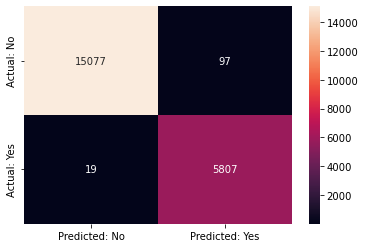

In [95]:
cm = confusion_matrix(y_test, y_pred7)
cm

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

In [82]:
# Results

In [96]:
df_test = df2_final[col]
y_pred_test = xgb.predict(df_test)

In [97]:
df2.head(3)

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,...,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line
0,105000,31-Mar-06,Existing,19,0,2006,Rs.4064000.0,Diversified Display Products o,No,Urban,...,17,326199,8128000.0,9403852.16,57,9-Mar-06,1702825000,0,ICICI Bank Ltd.,Yes
1,105001,31-Jan-95,Existing,0,0,1995,Rs.1463040.0,"FOOTE CONSULTING GROUP, INC.",Yes,Undefined,...,2,0,1625600.0,1625600.00,90,14-Dec-94,7908833003,1,South Indian Bank Ltd.,No
2,105002,30-Sep-06,Existing,7,5,2006,Rs.812800.0,INTEGRATED COMERCIAL ENTERPRIS,No,Urban,...,2,541611,1625600.0,3450336.00,81,25-Aug-06,2361626001,1,IDBI Bank Limited,Yes


In [98]:
result = pd.DataFrame()
result['ID'] = df2['ID']
result['Default'] = y_pred_test

In [99]:
result.head()

,ID,Default
0,105000,1
1,105001,0
2,105002,1
3,105003,0
4,105004,0


In [100]:
result.to_csv('F:/important/result5.csv',index= False)